# Atividade mínima

$\dfrac{d^2x}{dt^2} = - w_0^2 x - b \dfrac{dx}{dt}$

Sabendo que

$\dfrac{dx}{dt} = v,$

podemos reduzir a equação diferencial de segunda ordem, para uma equação diferencial de primeira ordem:

$\dfrac{d\vec{v}}{dt} = - w_0^2 x - b \vec{v} = \vec{f}(x, \vec{v})$


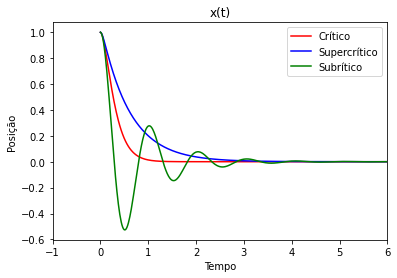

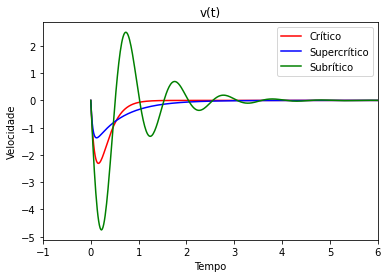

In [ ]:
'''
    Acima, a EDO de segunda ordem é transformada em duas EDOs de primeira ordem, via redução de ordem.
    Aqui, o método de Runge-Kutta de quarta ordem é utilizado nas EDOs de primeira ordem, utilizando o comando scipy.integrate.solve_ivp,
    variando os valores de b para obter resultados nos regimes de amortecimento crítico, subcrítico e supercrítico.


    Argumentos
    ----------
    y0 = array
        Armazena os valores iniciais de x e v (1 e 0 respectivamente)

    t = Lista
        Armazena diferentes valores de tempo igualmente espaçados.

    y = array
        Armazena os valores de x e v

    w = float
        Frequência angular da onda.

    b = float
        Coeficiente de amortecimento.

    f = array
        Armazena os valores resultado da EDO

    sc = OdeResult
        Armazena um array com os valores de t, e outro array com os valores de y, com amortecimento crítico

    
    sb = OdeResult
        Armazena um array com os valores de t, e outro array com os valores de y, com amortecimento subcrítico

    
    ss = OdeResult
        Armazena um array com os valores de t, e outro array com os valores de y, com amortecimento supercrítico
    

    Retorna
    -------
    Dois gráficos, um de x(t), e outro de v(t) para os 3 tipos diferentes de amortecimento.
    '''



import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

y0 = np.array([1, 0])

def OH(t, y, w, b):
    f = np.array([y[1], - (w**2)*y[0]- b*y[1]])
    return f

t = np.linspace(0, 15, 1000)

sc = solve_ivp(OH, (0, 15), y0, t_eval=t, args = (2*np.pi, 12.57))
ss = solve_ivp(OH, (0, 15), y0, t_eval=t, args = (2*np.pi, 25.14))
sb = solve_ivp(OH, (0, 15), y0, t_eval=t, args = (2*np.pi, 2.51))

plt.plot(sc.t, sc.y[0, :], 'r', markersize=1.0, label = 'Crítico')
plt.plot(ss.t, ss.y[0, :], 'b', markersize=0.3, label = 'Supercrítico')
plt.plot(sb.t, sb.y[0, :], 'g', markersize=0.3, label = 'Subrítico')
plt.xlabel('Tempo')
plt.ylabel('Posição')
plt.title('x(t)')
plt.xlim(-1, 6)
plt.legend()
plt.show()

plt.plot(sc.t, sc.y[1, :], 'r', markersize=1.0, label = 'Crítico')
plt.plot(ss.t, ss.y[1, :], 'b', markersize=0.3, label = 'Supercrítico')
plt.plot(sb.t, sb.y[1, :], 'g', markersize=0.3, label = 'Subrítico')
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.title('v(t)')
plt.xlim(-1, 6)
plt.legend()
plt.show()
